# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [4]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [6]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

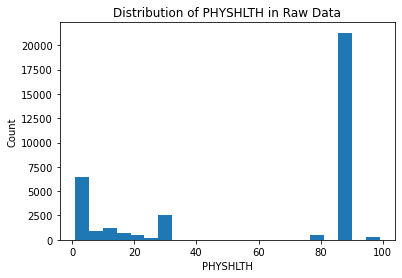

In [7]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [8]:
# Replace None with appropriate text
"""
 A very tall bar stands at exactly 100 on the x-axis, reaching almost the top of the y-axis (approximately 20,000).
 This count indicates that a large number of individuals reported 100 days of bad physical health out of the past 30 days.
 This seems unlikely and erroneous because the feature represents the number of days with bad physical health out of a maximum of 30 days.
 Therefore, values exceeding 30 are illogical.
"""

'\n A very tall bar stands at exactly 100 on the x-axis, reaching almost the top of the y-axis (approximately 20,000).\n This count indicates that a large number of individuals reported 100 days of bad physical health out of the past 30 days.\n This seems unlikely and erroneous because the feature represents the number of days with bad physical health out of a maximum of 30 days.\n Therefore, values exceeding 30 are illogical.\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [9]:
# Read the dataset
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)

# Check unique values and their labels for PHYSHLTH
physhlth_labels = {
    88: "None",
    77: "Don't know/Not sure",
    99: "Refused, and Not asked or Missing"
}

# Convert records where PHYSHLTH value label is "None" to 0
df.loc[df["PHYSHLTH"] == 88, "PHYSHLTH"] = 0

# Drop records with other non-applicable value labels for PHYSHLTH
non_applicable_labels = [77, 99]
df = df[~df["PHYSHLTH"].isin(non_applicable_labels)]
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Run the code below to ensure you have the correct, cleaned dataframe:

In [10]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [11]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

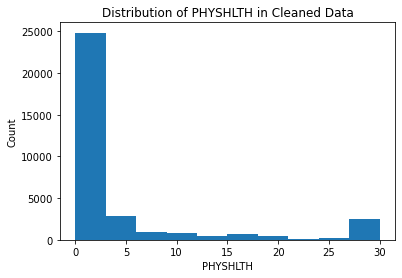

In [12]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [13]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

In [14]:
import pdfplumber

# Open the PDF file
with pdfplumber.open("data/data_dictionary.pdf") as pdf:
    # Loop through each page
    for page in pdf.pages:
        # Extract text from the page
        text = page.extract_text()
        # Print the text (you can perform further processing here)
        print(text)


LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
October 9, 2018
1 of 195 October 9, 2018
LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: State FIPS Code
Section Name: Record Identification
Section Number: 0
Question Number: 1
Column: 1-2
Type of Variable: Num
SAS Variable Name: _STATE
Question Prologue:
Question: State FIPS Code
Weighted
Value Value Label Frequency Percentage Percentage
1 Alabama 6,754 1.50 1.48
2 Alaska 3,203 0.71 0.22
4 Arizona 15,499 3.44 2.12
5 Arkansas 5,322 1.18 0.90
6 California 9,358 2.08 11.95
8 Colorado 9,802 2.18 1.72
9 Connecticut 10,588 2.35 1.11
10 Delaware 4,139 0.92 0.30
11 District of Columbia 3,868 0.86 0.22
12 Florida 22,059 4.90 6.61
13 Georgia 6,056 1.35 3.11
15 Hawaii 7,754 1.72 0.44
16 Idaho 4,894 1.09 0.50
17 Illinois 5,545 1.23 3.87
18 Indiana 13,829 3.07 2.00
19 Iowa 7,699 1.71 0.95
20 Kansas 21,843 4.85 0.86
2

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Resident of State
Section Name: Land Line Introduction
Section Number: 0
Question Number: 4
Column: 66
Type of Variable: Num
SAS Variable Name: STATERE1
Question Prologue: Variable only on the land line survey
Question: Do you currently live in ____(state)____?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes—Go to CELLFON4 197,456 100.00 100.00
BLANK Not asked or Missing 252,560 . .
Notes: QSTVER >= 20
Label: Cellular Telephone
Section Name: Land Line Introduction
Section Number: 0
Question Number: 5
Column: 67
Type of Variable: Num
SAS Variable Name: CELLFON4
Question Prologue: Variable only on the land line survey
Question: Is this a cell telephone? (Telephone service over the internet counts as landline service (includes Vonage,
Magic Jack and other home-based phone services).)[Read only if necessary: “By cellular (or cell) telephone we mean a
telep

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: General Health
Section Name: Health Status
Core Section Number: 1
Question Number: 1
Column: 90
Type of Variable: Num
SAS Variable Name: GENHLTH
Question Prologue:
Question: Would you say that in general your health is:
Weighted
Value Value Label Frequency Percentage Percentage
1 Excellent 74,356 16.52 17.87
2 Very good 145,479 32.33 31.25
3 Good 142,502 31.67 32.03
4 Fair 62,213 13.82 13.75
5 Poor 24,317 5.40 4.85
7 Don’t know/Not Sure 707 0.16 0.16
9 Refused 439 0.10 0.08
BLANK Not asked or Missing 3 . .
Label: Number of Days Physical Health Not Good
Section Name: Healthy Days — Health Related Quality of Life
Core Section Number: 2
Question Number: 1
Column: 91-92
Type of Variable: Num
SAS Variable Name: PHYSHLTH
Question Prologue:
Question: Now thinking about your physical health, which includes physical illness and injury, for how many days during
the past 30 days 

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Currently taking medicine for high cholesterol
Section Name: Cholesterol Awareness
Core Section Number: 5
Question Number: 3
Column: 105
Type of Variable: Num
SAS Variable Name: CHOLMED1
Question Prologue:
Question: Are you currently taking medicine prescribed by a doctor or other health professional for your blood
cholesterol?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 100,713 63.45 56.70
2 No 57,434 36.18 43.00
7 Don’t know/Not Sure 459 0.29 0.22
9 Refused 118 0.07 0.09
BLANK Not asked or Missing 291,292 . .
Notes: Section 05.01, CHOLCHK1, is coded 1, 9,
or Missing; or Section 05.02, TOLDHI2, is coded
2, 7, 9, or Missing
Label: Ever Diagnosed with Heart Attack
Section Name: Chronic Health Conditions
Core Section Number: 6
Question Number: 1
Column: 106
Type of Variable: Num
SAS Variable Name: CVDINFR4
Question Prologue: Has a doctor, nurse, or o

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Limited Because of Joint Symptoms
Section Name: Arthritis Burden
Core Section Number: 7
Question Number: 1
Column: 120
Type of Variable: Num
SAS Variable Name: LMTJOIN3
Question Prologue: Arthritis can cause symptoms like pain, aching, or stiffness in or around a joint.
Question: Are you now limited in any way in any of your usual activities because of arthritis or joint symptoms?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 74,357 50.48 52.07
2 No 71,721 48.69 47.19
7 Don’t know/Not sure 1,017 0.69 0.60
9 Refused 192 0.13 0.15
BLANK Not asked or Missing 302,729 . .
Notes: Section 06.09, HAVARTH3, is coded 2, 7,
9, or Missing
Label: Does Arthritis Affect Whether You Work
Section Name: Arthritis Burden
Core Section Number: 7
Question Number: 2
Column: 121
Type of Variable: Num
SAS Variable Name: ARTHDIS2
Question Prologue: In this next question we ar

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Employment Status
Section Name: Demographics
Core Section Number: 8
Question Number: 15
Column: 177
Type of Variable: Num
SAS Variable Name: EMPLOY1
Question Prologue:
Question: Are you currently…?
Weighted
Value Value Label Frequency Percentage Percentage
1 Employed for wages 184,093 40.91 47.26
2 Self-employed 39,592 8.80 9.08
3 Out of work for 1 year or more 10,489 2.33 2.74
4 Out of work for less than 1 year 9,225 2.05 2.87
5 A homemaker 24,376 5.42 6.37
6 A student 12,181 2.71 5.78
7 Retired 133,648 29.70 18.02
8 Unable to work 32,706 7.27 6.89
9 Refused 3,700 0.82 1.00
BLANK Not asked or Missing 6 . .
Label: Number of Children in Household
Section Name: Demographics
Core Section Number: 8
Question Number: 16
Column: 178-179
Type of Variable: Num
SAS Variable Name: CHILDREN
Question Prologue:
Question: How many children less than 18 years of age live in your house

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Smoked at Least 100 Cigarettes
Section Name: Tobacco Use
Core Section Number: 9
Question Number: 1
Column: 198
Type of Variable: Num
SAS Variable Name: SMOKE100
Question Prologue:
Question: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 185,596 42.76 40.07
2 No—Go to Section 09.05 USENOW3 246,104 56.70 59.38
7 Don’t know/Not Sure—Go to Section 09.05 USENOW3 1,937 0.45 0.36
9 Refused—Go to Section 09.05 USENOW3 445 0.10 0.18
BLANK Not asked or Missing 15,934 . .
Label: Frequency of Days Now Smoking
Section Name: Tobacco Use
Core Section Number: 9
Question Number: 2
Column: 199
Type of Variable: Num
SAS Variable Name: SMOKDAY2
Question Prologue:
Question: Do you now smoke cigarettes every day, some days, or not at all?
Weighted
Value Value Label Frequency Perce

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Most drinks on single occasion past 30 days
Section Name: Alcohol Consumption
Core Section Number: 11
Question Number: 4
Column: 213-214
Type of Variable: Num
SAS Variable Name: MAXDRNKS
Question Prologue:
Question: During the past 30 days, what is the largest number of drinks you had on any occasion?
Weighted
Value Value Label Frequency Percentage Percentage
1 - 76 Number of drinks 212,836 96.89 96.35
77 Don’t know/Not sure 5,797 2.64 3.18
99 Refused 1,043 0.47 0.47
BLANK Not asked or Missing 230,340 . .
Notes: Section 11.01, ALCDAY5, is coded 888,
777, or 999;
Label: How many times did you eat fruit?
Section Name: Fruits & Vegetables
Core Section Number: 12
Question Number: 1
Column: 215-217
Type of Variable: Num
SAS Variable Name: FRUIT2
Question Prologue: You can tell me times per day, times per week or times per month.
Question: Not including juices, how often did

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Type of Physical Activity
Section Name: Exercise (Physical Activity)
Core Section Number: 13
Question Number: 2
Column: 234-235
Type of Variable: Num
SAS Variable Name: EXRACT11
Question Prologue:
Question: What type of physical activity or exercise did you spend the most time doing during the past month?
Weighted
Value Value Label Frequency Percentage Percentage
58 Swimming in laps 1,468 0.49 0.46
59 Table tennis 49 0.02 0.02
60 Tai Chi 345 0.11 0.08
61 Tennis 1,160 0.39 0.39
62 Touch football 66 0.02 0.05
63 Volleyball 446 0.15 0.18
64 Walking 161,054 53.57 48.89
66 Waterskiing 97 0.03 0.03
67 Weight lifting 12,927 4.30 5.98
68 Wrestling 110 0.04 0.06
69 Yoga 3,607 1.20 1.25
71 Childcare 481 0.16 0.20
72 Farm/Ranch Work (caring for livestock, stacking 1,208 0.40 0.24
hay, etc.)
73 Household Activities (vacuuming, dusting, home 1,762 0.59 0.47
repair, etc.)
74 Karate/

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: How many times did you do physical activities or exercises to STRENGTHEN your muscles?
Section Name: Exercise (Physical Activity)
Core Section Number: 13
Question Number: 8
Column: 250-252
Type of Variable: Num
SAS Variable Name: STRENGTH
Question Prologue:
Question: During the past month, how many times per week or per month did you do physical activities or exercises to
STRENGTHEN your muscles? [Do NOT count aerobic activities like walking, running, or bicycling. Count activities using
your own body weight like yoga, sit-ups or push-ups and those using weight machines, free weights, or elastic bands.]
Weighted
Value Value Label Frequency Percentage Percentage
101 - 199 Times per week 109,644 26.56 28.92
201 - 299 Times per month 49,183 11.92 12.93
777 Don’t know / Not sure 3,001 0.73 0.63
888 Never 249,750 60.50 57.07
999 Refused 1,202 0.29 0.45
BLANK Not asked or Mi

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: How Often Check Blood for Glucose
Section Name: Diabetes
Module Section Number: 2
Question Number: 2
Column: 293-295
Type of Variable: Num
SAS Variable Name: BLDSUGAR
Question Prologue:
Question: About how often do you check your blood for glucose or sugar? [Include times when checked by a family
member or friend, but do NOT include times when checked by a health professional.]
Weighted
Value Value Label Frequency Percentage Percentage
101 - 199 Times per day 22,684 59.28 59.33
Notes: 1 _ _ Times per day
201 - 299 Times per week 6,239 16.31 15.92
Notes: 2 _ _ Times per week
301 - 399 Times per month 2,221 5.80 5.87
Notes: 3 _ _ Times per month
401 - 499 Times per year 906 2.37 2.22
Notes: 4 _ _ Times per year
777 Don’t know/Not sure 576 1.51 1.73
888 Never 5,520 14.43 14.53
999 Refused 117 0.31 0.40
BLANK Not asked or Missing 411,753 . .
Notes: Section 06.12, DIABETE3,

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Have you ever been given a breathing test?
Section Name: Respiratory Health (COPD Symptoms)
Module Section Number: 3
Question Number: 4
Column: 311
Type of Variable: Num
SAS Variable Name: COPDBTST
Question Prologue:
Question: Have you ever been given a breathing test to diagnose breathing problems?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 21,868 32.34 28.78
2 No 44,799 66.25 69.93
7 Don’t know/Not Sure 917 1.36 1.19
9 Refused 35 0.05 0.10
BLANK Not asked or Missing 382,397 . .
Label: How many years have you smoked tobacco products?
Section Name: Respiratory Health (COPD Symptoms)
Module Section Number: 3
Question Number: 5
Column: 312-313
Type of Variable: Num
SAS Variable Name: COPDSMOK
Question Prologue:
Question: Over your lifetime, how many years have you smoked tobacco products?
Weighted
Value Value Label Frequency Percentage Percentage
1 

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Hlth care pro ever advised using less salt to reduce BP
Section Name: Actions to Control High Blood Pressure
Module Section Number: 5
Question Number: 6
Column: 326
Type of Variable: Num
SAS Variable Name: BPSLTADV
Question Prologue: [Has a doctor or other health professional ever advised you to do any of the following to help lower or
control your high blood pressure?]
Question: (Ever advised you to) cut down on salt (to help lower or control your high blood pressure)?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 5,929 65.20 64.60
2 No 2,657 29.22 30.68
3 Do not use salt 422 4.64 3.82
7 Don’t know/Not Sure 72 0.79 0.69
9 Refused 14 0.15 0.20
BLANK Not asked or Missing 440,922 . .
Notes: Section 04.01, BPHIGH4, is coded 2, 3, 4,
7, 9, or Missing
Label: Hlth care pro ever advised reduced alcohol use to reduce BP
Section Name: Actions to Control High 

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Urgent Asthma Treatment During Past 12 Months
Section Name: Adult Asthma History
Module Section Number: 7
Question Number: 4
Column: 340-341
Type of Variable: Num
SAS Variable Name: ASDRVIST
Question Prologue: [If one or more visits to Q3, fill in “Besides those emergency room or urgent care center visits,”]
Question: During the past 12 months, how many times did you see a doctor, nurse or other health professional for urgent
treatment of worsening asthma symptoms?
Weighted
Value Value Label Frequency Percentage Percentage
1 - 87 Number of visits [87 = 87 or more] 136 44.16 43.58
Notes: 87=87 or more
88 None 167 54.22 54.39
98 Don’t know/Not sure 5 1.62 2.04
BLANK Not asked or Missing 449,708 . .
Notes: Section 06.04, ASTHMA3, is coded 2, 7, 9,
or Missing; or Section 06.05, ASTHNOW, is coded
2, 7, 9, or Missing; or Module 07.02, ASATTACK,
is coded 2, 7, 9 or Missing
La

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: How Much Time Do You Sleep
Section Name: Sleep Disorder
Module Section Number: 9
Question Number: 1
Column: 359-360
Type of Variable: Num
SAS Variable Name: SLEPTIM1
Question Prologue:
Question: On average, how many hours of sleep do you get in a 24-hour period?
Weighted
Value Value Label Frequency Percentage Percentage
1 - 24 Number of hours [1-24] 49,365 98.79 98.70
77 Don’t know/Not Sure 546 1.09 1.18
99 Refused 58 0.12 0.11
BLANK Missing 400,047 . .
Label: Days had trouble with sleep
Section Name: Sleep Disorder
Module Section Number: 9
Question Number: 2
Column: 361-362
Type of Variable: Num
SAS Variable Name: ADSLEEP
Question Prologue:
Question: Over the last 2 weeks, how many days have you had trouble falling asleep or staying asleep or sleeping too
much?
Weighted
Value Value Label Frequency Percentage Percentage
1 - 14 01-14 days 23,537 47.14 47.46
88 None 25,4

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Satisfied With Care Received
Section Name: Health Care Access
Module Section Number: 10
Question Number: 7
Column: 401
Type of Variable: Num
SAS Variable Name: CARERCVD
Question Prologue:
Question: In general, how satisfied are you with the health care you received? Would you say—
Weighted
Value Value Label Frequency Percentage Percentage
1 Very satisfied 28,639 63.26 59.91
2 Somewhat satisfied 12,991 28.69 30.74
3 Not at all satisfied 2,063 4.56 5.02
7 Don’t know/Not Sure 389 0.86 0.78
8 Not applicable 1,111 2.45 3.32
9 Refused 80 0.18 0.23
BLANK Not asked or Missing 404,743 . .
Label: Currently Have Health Care Bills
Section Name: Health Care Access
Module Section Number: 10
Question Number: 8
Column: 402
Type of Variable: Num
SAS Variable Name: MEDBILL1
Question Prologue:
Question: Do you currently have any health care bills that are being paid off over time? (This 

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Type of Cancer
Section Name: Cancer Survivorship
Module Section Number: 12
Question Number: 3
Column: 411-412
Type of Variable: Num
SAS Variable Name: CNCRTYP1
Question Prologue:
Question: What type of cancer was it? (If Response = 2 (Two) or 3 (Three or more), ask: “With your most recent
diagnoses of cancer, what type of cancer was it?”)
Weighted
Value Value Label Frequency Percentage Percentage
30 Other 489 6.13 6.76
77 Don’t know/Not Sure 330 4.14 3.98
99 Refused 27 0.34 0.45
BLANK Missing 442,040 . .
Notes: Section 06.06, CHCSCNCR, is coded 2, 7,
9 or Missing and Section 06.07, CHCOCNCR, is
coded 2, 7, 9 or Missing ; or Module 13.01,
CNCRDIFF, is coded 7, 9 or missing
Label: Currently Receiving Treatment for Cancer
Section Name: Cancer Survivorship
Module Section Number: 12
Question Number: 4
Column: 413
Type of Variable: Num
SAS Variable Name: CSRVTRT2
Question Pr

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Currently Have Physical Pain From Cancer Or Treatment?
Section Name: Cancer Survivorship
Module Section Number: 12
Question Number: 12
Column: 422
Type of Variable: Num
SAS Variable Name: CSRVPAIN
Question Prologue:
Question: Do you currently have physical pain caused by your cancer or cancer treatment?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 385 7.91 9.06
2 No—Go to next module 4,468 91.78 90.71
7 Don’t know/Not Sure—Go to next module 15 0.31 0.23
BLANK Not asked or Missing 445,148 . .
Notes: Section 06.06, CHCSCNCR, is coded 2, 7,
9 or Missing and Section 06.07, CHCOCNCR, is
coded 2, 7, 9 or Missing ; or Module 13.01,
CNCRDIFF, is coded 7, 9 or Missing; or Module
13.04, CSRVTRT2, is coded 1, 3, 4, 7, 9 or
Missing;
Label: Is Pain Under Control?
Section Name: Cancer Survivorship
Module Section Number: 12
Question Number: 13
Column: 423
Type of 

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: What did you do to keep you from getting pregnant?
Section Name: Preconception Health/Family Planning
Module Section Number: 16
Question Number: 2
Column: 437-438
Type of Variable: Num
SAS Variable Name: TYPCNTR7
Question Prologue:
Question: What did you or your partner do the last time you had sex to keep you from getting pregnant?
Weighted
Value Value Label Frequency Percentage Percentage
1 Female sterilization (ex. Tubal ligation, 1,954 9.40 7.86
Essure, Adiana)—Go to next module
2 Male sterilization (vasectomy)—Go to next 1,871 9.00 6.28
module
3 Contraceptive implant (ex. Implanon)—Go to next 817 3.93 4.81
module
4 Levonorgestrel (LNG) or hormonal IUD (ex. 795 3.83 3.28
Mirena)—Go to next module
5 Copper-bearing IUD (ex. ParaGard)—Go to next 466 2.24 2.40
module
6 IUD, type unknown—Go to next module 1,840 8.85 7.69
7 Shots (ex. Depo-Provera)—Go to next module 446 

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: How old when you last smoked?
Section Name: Lung Cancer Screening
Module Section Number: 20
Question Number: 2
Column: 450-452
Type of Variable: Num
SAS Variable Name: LCSLAST
Question Prologue:
Question: How old were you when you last smoked cigarettes regularly?
Weighted
Value Value Label Frequency Percentage Percentage
1 - 100 Age in Years 22,778 95.07 94.55
777 Don’t know/Not Sure 1,023 4.27 4.51
999 Refused 157 0.66 0.94
BLANK Not asked or Missing 426,058 . .
Notes: Section 09.01, SMOKE100, is coded 2, 7,
9, or Missing; or Section 09.02, SMOKDAY2, is
coded 7, 9, or Missing; or Module 20.01,
LCSFIRST, is coded 888 or missing
Label: On average, how many cigarettes do you smoke each day?
Section Name: Lung Cancer Screening
Module Section Number: 20
Question Number: 3
Column: 453-455
Type of Variable: Num
SAS Variable Name: LCSNUMCG
Question Prologue:
Question: On ave

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Which support do you MOST need that you are not getting?
Section Name: Caregiving
Module Section Number: 21
Question Number: 8
Column: 466
Type of Variable: Num
SAS Variable Name: CRGVMST2
Question Prologue:
Question: Of the following support services, which one do you MOST need, that you are not currently getting?
Weighted
Value Value Label Frequency Percentage Percentage
1 Classes about giving care, such as giving 83 1.70 2.08
medications
2 Help in getting access to services 423 8.68 7.18
3 Support groups 112 2.30 2.23
4 Individual counseling to help cope with giving 134 2.75 2.99
care
5 Respite care 174 3.57 3.46
6 You don’t need any of these support services 3,835 78.68 79.35
7 Don’t know/Not Sure 72 1.48 1.91
9 Refused 41 0.84 0.81
BLANK Not asked or Missing 445,142 . .
Notes: Module 21.01, CAREGIV1, is coded 2, 8, 7
or 9
Label: Do you expect to have a relative yo

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Neighborhood Safe From Crime
Section Name: Social Determinants of Health
Module Section Number: 24
Question Number: 3
Column: 479
Type of Variable: Num
SAS Variable Name: HOWSAFE1
Question Prologue:
Question: How safe from crime do you consider your neighborhood to be?
Weighted
Value Value Label Frequency Percentage Percentage
1 Extremely safe 37,703 42.76 37.55
2 Safe 46,232 52.44 56.10
3 Unsafe 2,945 3.34 4.32
4 Extremely unsafe 555 0.63 1.02
7 Don’t know/Not Sure 588 0.67 0.78
9 Refused 146 0.17 0.23
BLANK Not asked or Missing 361,847 . .
Label: No money for food?
Section Name: Social Determinants of Health
Module Section Number: 24
Question Number: 4
Column: 480
Type of Variable: Num
SAS Variable Name: SDHFOOD
Question Prologue: For the next two statements, please tell me whether the statement was often true, sometimes true, or
never true for you in the last 12 mon

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Hlth pro ever said child has asthma
Section Name: Childhood Asthma Prevalence
Module Section Number: 29
Question Number: 1
Column: 731
Type of Variable: Num
SAS Variable Name: CASTHDX2
Question Prologue:
Question: Has a doctor, nurse or other health professional EVER said that the child has asthma?
Weighted
Value Value Label Frequency Percentage Percentage
1 Yes 6,612 12.21 11.45
2 No—Go to next module 45,379 83.82 83.71
7 Don’t know/Not Sure—Go to next module 626 1.16 1.27
9 Refused—Go to next module 1,523 2.81 3.57
BLANK Not asked or Missing 395,876 . .
Notes: Section 08.16, CHILDREN, is coded 0, 88,
99, or Missing
Label: Child still have asthma?
Section Name: Childhood Asthma Prevalence
Module Section Number: 29
Question Number: 2
Column: 732
Type of Variable: Num
SAS Variable Name: CASTHNO2
Question Prologue:
Question: Does the child still have asthma?
Weighted
Val

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Preferred Child Race Categories
Section Name: Child Demographic Variables
Module Section Number: 1
Question Number: 05
Column: 1589-1590
Type of Variable: Num
SAS Variable Name: _CPRACE
Question Prologue:
Question: Preferred Child Race Categories
Weighted
Value Value Label Frequency Percentage Percentage
1 White 43,307 69.67 64.17
2 Black or African American 5,977 9.62 12.49
3 American Indian or Alaskan Native 1,928 3.10 1.28
4 Asian 1,754 2.82 5.22
5 Native Hawaiian or other Pacific Islander 323 0.52 0.34
6 Other race 1,913 3.08 4.75
7 No preferred race 3,250 5.23 4.33
77 Don’t know/Not sure 797 1.28 1.54
99 Refused 2,907 4.68 5.88
BLANK Missing 387,860 . .
Label: Final child weight: Land-line and Cell-Phone data
Section Name: Child Weighting Variables
Module Section Number: 1
Question Number: 5
Column: 1632-1641
Type of Variable: Num
SAS Variable Name: _CLLCPWT
Quest

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Current Asthma Calculated Variable
Section Name: Calculated Variables
Module Section Number: 6
Question Number: 3
Column: 1955
Type of Variable: Num
SAS Variable Name: _CASTHM1
Question Prologue:
Question: Adults who have been told they currently have asthma
Weighted
Value Value Label Frequency Percentage Percentage
1 No 404,548 89.90 90.28
Notes: ASTHMA3 = 2 or ASTHMA3 = 1 and ASTHNOW =
2
2 Yes 42,254 9.39 9.03
Notes: ASTHMA3 = 1 and ASTHNOW = 1
9 Don’t know/Not Sure Or Refused/Missing 3,214 0.71 0.70
Notes: ASTHMA3 = 7 or 9 or Missing or ASTHNOW =
7 or 9 or Missing
Label: Computed Asthma Status
Section Name: Calculated Variables
Module Section Number: 6
Question Number: 4
Column: 1956
Type of Variable: Num
SAS Variable Name: _ASTHMS1
Question Prologue:
Question: Computed asthma status
Weighted
Value Value Label Frequency Percentage Percentage
1 Current 42,254 9.39 9.

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Computed race groups used for internet prevalence tables
Section Name: Calculated Race Variables
Module Section Number: 8
Question Number: 10
Column: 2027
Type of Variable: Num
SAS Variable Name: _RACE_G1
Question Prologue:
Question: Race groups used for internet prevalence tables
Weighted
Value Value Label Frequency Percentage Percentage
1 White - Non-Hispanic 337,166 76.41 62.62
2 Black - Non-Hispanic 35,765 8.11 11.81
3 Hispanic 37,078 8.40 17.05
4 Other race only, Non-Hispanic 22,076 5.00 7.11
5 Multiracial, Non-Hispanic 9,176 2.08 1.41
BLANK Don’t know/Not sure/Refused component question 8,755 . .
162 of 195 October 9, 2018
LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Reported age in five-year age categories calculated variable
Section Name: Calculated Variables
Module Section Number: 8
Ques

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Computed level of education completed categories
Section Name: Calculated Variables
Module Section Number: 8
Question Number: 22
Column: 2052
Type of Variable: Num
SAS Variable Name: _EDUCAG
Question Prologue:
Question: Level of education completed
Weighted
Value Value Label Frequency Percentage Percentage
1 Did not graduate High School 32,687 7.26 13.55
Notes: EDUCA = 1 or 2 or 3
2 Graduated High School 122,577 27.24 27.90
Notes: EDUCA = 4
3 Attended College or Technical School 124,655 27.70 30.92
Notes: EDUCA = 5
4 Graduated from College or Technical School 168,390 37.42 27.24
Notes: EDUCA = 6
9 Don’t know/Not sure/Missing 1,707 0.38 0.40
Notes: EDUCA = 9 or Missing
Label: Computed income categories
Section Name: Calculated Variables
Module Section Number: 8
Question Number: 23
Column: 2053
Type of Variable: Num
SAS Variable Name: _INCOMG
Question Prologue:
Question:

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Computed Potato Servings per day
Section Name: Calculated Variables
Module Section Number: 12
Question Number: 5
Column: 2085-2088
Type of Variable: Num
SAS Variable Name: POTADA1_
Question Prologue:
Question: Potato servings per day
Weighted
Value Value Label Frequency Percentage Percentage
0 - 9999 Times per day 413,317 100.00 100.00
BLANK Don’t know/Not Sure Or Refused/Missing 36,699 . .
Label: Computed Other Vegetable intake in times per day
Section Name: Calculated Variables
Module Section Number: 12
Question Number: 6
Column: 2089-2092
Type of Variable: Num
SAS Variable Name: VEGEDA2_
Question Prologue:
Question: Other vegetable intake in times per day
Weighted
Value Value Label Frequency Percentage Percentage
0 - 9999 Times per day (two implied decimal places) 412,764 100.00 100.00
BLANK Don’t know/Not Sure Or Refused/Missing 37,252 . .
Label: The number of miss

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Activity MET Value for Second Activity
Section Name: Calculated Variables
Module Section Number: 13
Question Number: 3
Column: 2119-2121
Type of Variable: Num
SAS Variable Name: METVL21_
Question Prologue:
Question: Activity MET Value for Second Activity
Weighted
Value Value Label Frequency Percentage Percentage
0 Activity MET Value 123,958 42.11 44.13
1 - 128 Activity MET Value (one implied decimal place) 170,428 57.89 55.87
BLANK Not asked or Missing 155,630 . .
Label: Estimated Age-Gender Specific Maximum Oxygen Consumption
Section Name: Calculated Variables
Module Section Number: 13
Question Number: 4
Column: 2122-2126
Type of Variable: Num
SAS Variable Name: MAXVO2_
Question Prologue:
Question: Estimated Age-Gender Specific Maximum Oxygen Consumption
Weighted
Value Value Label Frequency Percentage Percentage
0 - 501 Estimated Maximum Oxygen Consumption (two 443,71

LLCP 2017 Codebook Report
Overall version data weighted with _LLCPWT
Behavioral Risk Factor Surveillance System
Label: Minutes of total Vigorous Physical Activity per week
Section Name: Calculated Variables
Module Section Number: 13
Question Number: 21
Column: 2191-2195
Type of Variable: Num
SAS Variable Name: PA1VIGM_
Question Prologue:
Question: Minutes of total Vigorous Physical Activity per week
Weighted
Value Value Label Frequency Percentage Percentage
0 - 99999 Minutes of Activity per week 294,863 100.00 100.00
BLANK Not asked or Missing 155,153 . .
Label: Physical Activity Categories
Section Name: Calculated Variables
Module Section Number: 13
Question Number: 22
Column: 2196
Type of Variable: Num
SAS Variable Name: _PACAT1
Question Prologue:
Question: Physical Activity Categories
Weighted
Value Value Label Frequency Percentage Percentage
1 Highly Active 132,377 29.42 26.61
2 Active 71,114 15.80 16.47
3 Insufficiently Active 73,339 16.30 17.76
4 Inactive 120,505 26.78 25.91
9 Do

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [15]:
df["_STATE"].replace({36: "New York", 34: "New Jersey", 9: "Connecticut"}, inplace=True)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,New York,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,New York,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,New York,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,New York,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Below, we check the values:

In [16]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

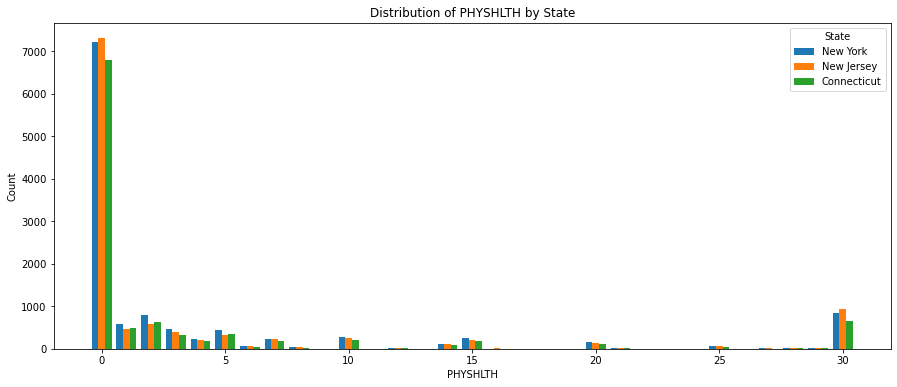

In [17]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [18]:
# Replace None with appropriate text
"""
the distribution of PHYSHLTH varies across these three states, with differences in the prevalence of health-related issues
"""

'\nthe distribution of PHYSHLTH varies across these three states, with differences in the prevalence of health-related issues\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [19]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [20]:
# Replace None with appropriate text
"""
ANOVA is deemed the most suitable technique as we aim to ascertain whether there exists a disparity in
PHYSHLTH (a numerical feature) among three categories. 
While a t-test would be fitting for two categories, opting for ANOVA is preferred given the presence of three categories.
"""

'\nANOVA is deemed the most suitable technique as we aim to ascertain whether there exists a disparity in\nPHYSHLTH (a numerical feature) among three categories. \nWhile a t-test would be fitting for two categories, opting for ANOVA is preferred given the presence of three categories.\n'

Now, identify the null and alternative hypotheses:

In [21]:
# Replace None with appropriate text
"""
Null Hypothesis: The mean values of PHYSHLTH are equal across all states.

Alternative Hypothesis: The mean values of PHYSHLTH vary across states.
"""

'\nNull Hypothesis: The mean values of PHYSHLTH are equal across all states.\n\nAlternative Hypothesis: The mean values of PHYSHLTH vary across states.\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

ImportError: cannot import name 'tools' from 'statsmodels' (C:\Users\user\anaconda350\envs\learn-env\lib\site-packages\statsmodels\__init__.py)

Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [ ]:
# Replace None with appropriate text
"""
None
"""

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [25]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [39]:
# Your code here
# Replace codes with labels
df["RENTHOM1"].replace({1: "Own", 2: "Rent"}, inplace=True)

# Only keep records with those labels
df = df[df["RENTHOM1"].isin(["Own", "Rent"])].copy()

df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,NICOTINE_USE,CHRONIC
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0,0
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,0,0
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,0,0
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,0,0
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303773,New York,4.0,4212017,4,21,2017,1200.0,2017012244,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,1,0
303774,New York,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,1,0
303775,New York,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0,0
303776,New York,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,1,0


In [40]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [42]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

AssertionError: 

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

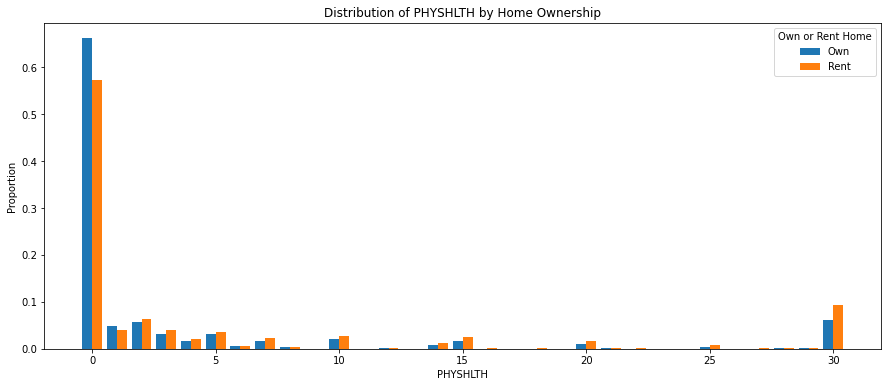

In [43]:
# Your code here
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[own, rent],
    label=["Own", "Rent"],
    bins=range(32),
    align="left",
    density=True
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Proportion")
ax.set_title("Distribution of PHYSHLTH by Home Ownership")

ax.legend(title="Own or Rent Home");

Then run this code to find the averages:

In [38]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
1.0    3.531213
2.0    5.197970
3.0    4.385976
7.0    3.913978
9.0    5.005155
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [ ]:
# Replace None with appropriate text
"""
Although the general distribution appears similar, a notable disparity emerges between renters and homeowners.
Homeowners tend to report fewer unhealthy days compared to renters, who are more inclined to report various numbers of unhealthy days.

Furthermore, the variance in means is pronounced: approximately 3.5 unhealthy days per month for homeowners versus 
roughly 5.2 unhealthy days per month for renters.
"""

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [ ]:
# Your code here (create additional cells as needed)
"""
Here we opt for a t-test as we're comparing a numeric variable (PHYSHLTH) against a categorical variable (RENTHOM1),
with the latter comprising only two categories.

Null hypothesis: There's no disparity in the mean number of unhealthy days per month between homeowners and renters.

Alternative hypothesis: Renters exhibit a higher mean number of unhealthy days per month compared to homeowners.

Since we specify the alternative hypothesis as "more" rather than simply stating that the means differ, 
this constitutes a one-tailed t-test, necessitating division of the SciPy t-test result by two.
"""

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [30]:
# Your code here
# Set everything to 0 initially
df["NICOTINE_USE"] = 0

# Make a mask to select the relevant values
# (this separate variable is not necessary
# but helps with readability)
mask = (
    # Has smoked at least 100 cigarettes
    (df["SMOKE100"] == 1) |
    # Uses chewing tobacco/snuff/snus every day or some days
    (df["USENOW3"] == 1) |
    (df["USENOW3"] == 2) |
    # Has smoked an e-cigarette
    (df["ECIGARET"] == 1)
)

# Set values to 1 where the mask condition is true
df.loc[mask, "NICOTINE_USE"] = 1

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.564761
1    0.435239
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [31]:
# Your code here
df["CHRONIC"] = (df["PHYSHLTH"] >= 15).apply(int)
# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    29834
1     3913
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [32]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,17312,12522
1,1747,2166


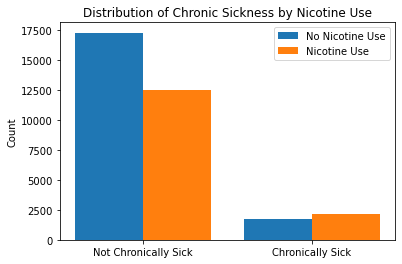

In [33]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [35]:
"""
In this analysis, we are examining the relationship between two categorical features, each with two categories.
A chi-squared test is suitable for this comparison, as it evaluates whether the observed proportions significantly differ from the expected proportions.

Null hypothesis: Chronic sickness and nicotine use are independent variables, meaning that the proportion of individuals 
reporting chronic sickness is not influenced by whether or not they have used nicotine.

Alternative hypothesis: Chronic sickness and nicotine use are not independent variables, suggesting that the proportion of
individuals reporting chronic sickness differs based on their nicotine use status.
"""

'\nIn this analysis, we are examining the relationship between two categorical features, each with two categories.\nA chi-squared test is suitable for this comparison, as it evaluates whether the observed proportions significantly differ from the expected proportions.\n\nNull hypothesis: Chronic sickness and nicotine use are independent variables, meaning that the proportion of individuals \nreporting chronic sickness is not influenced by whether or not they have used nicotine.\n\nAlternative hypothesis: Chronic sickness and nicotine use are not independent variables, suggesting that the proportion of\nindividuals reporting chronic sickness differs based on their nicotine use status.\n'

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [ ]:
# Your code here (create additional cells as needed)

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.